## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (10,6)

## Load the Dataset

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.shape

(144, 2)

## Checking the null values

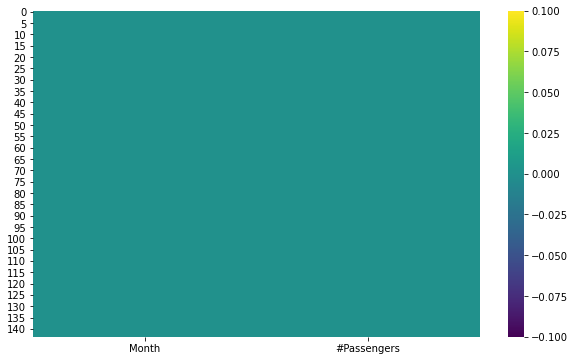

In [4]:
sns.heatmap(data.isnull(),cmap='viridis');

In [5]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [6]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [7]:
from datetime import datetime

In [8]:
data.columns=['Month','Passengers']
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format =True)

In [10]:
data.head(2)

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118


In [11]:
data = data.set_index('Month')
data.head(2)

,Passengers
Month,
1949-01-01,112
1949-02-01,118


## Plot graph

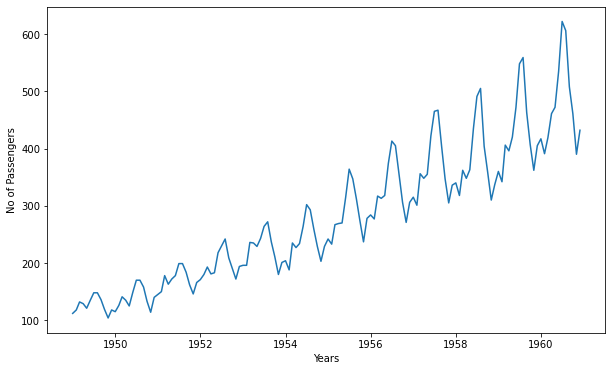

In [12]:
plt.xlabel('Years')
plt.ylabel('No of Passengers')
plt.plot(data)

## To check the Data is stationary or Not we can use two methods:
* Rolling Statistics
* ADCF Test

In [13]:
## Test1
## Using Rolling Statistics

rollmean = data.rolling(window=12).mean()
rollstd = data.rolling(window=12).std()
rollmean,rollstd

(            Passengers
 Month                 
 1949-01-01         NaN
 1949-02-01         NaN
 1949-03-01         NaN
 1949-04-01         NaN
 1949-05-01         NaN
 ...                ...
 1960-08-01  463.333333
 1960-09-01  467.083333
 1960-10-01  471.583333
 1960-11-01  473.916667
 1960-12-01  476.166667
 
 [144 rows x 1 columns],
             Passengers
 Month                 
 1949-01-01         NaN
 1949-02-01         NaN
 1949-03-01         NaN
 1949-04-01         NaN
 1949-05-01         NaN
 ...                ...
 1960-08-01   83.630500
 1960-09-01   84.617276
 1960-10-01   82.541954
 1960-11-01   79.502382
 1960-12-01   77.737125
 
 [144 rows x 1 columns])

## Ploting rolling statisctics

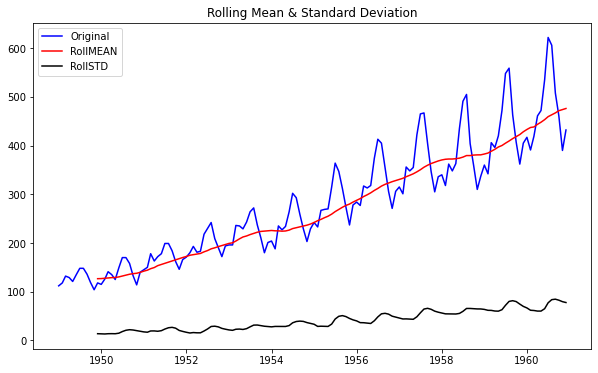

In [14]:
original = plt.plot(data,color='blue',label='Original')
mean     = plt.plot(rollmean,color='red',label='RollMEAN')
std      = plt.plot(rollstd,color='black',label='RollSTD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show();

##### Here we can see that mean and std is not constatnt so we can say that data is not stationary.

In [15]:
## Tset 2
## Using Dicky foller test (ADCF Test)

from statsmodels.tsa.stattools import adfuller

print('Dickeyfuller Test Result')
dftest = adfuller(data['Passengers'],autolag='AIC') #AIC gives the information about Diff. btw Actual & Exact.
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','P-Value','Lag used','No. of observation'])

for now,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%now] = value

print(dfoutput)


Dickeyfuller Test Result
Test Statistics          0.815369
P-Value                  0.991880
Lag used                13.000000
No. of observation     130.000000
Critical Value(1%)      -3.481682
Critical Value(5%)      -2.884042
Critical Value(10%)     -2.578770
dtype: float64


###### Cant reject the null hypothesis and can say that data is not stationary.

## Estimating the Trend of the data

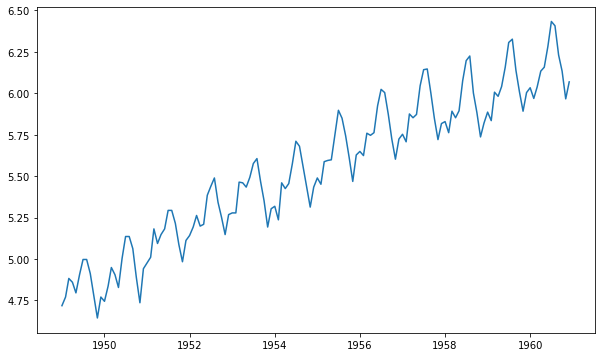

In [16]:
data_logScale = np.log(data)
plt.plot(data_logScale);

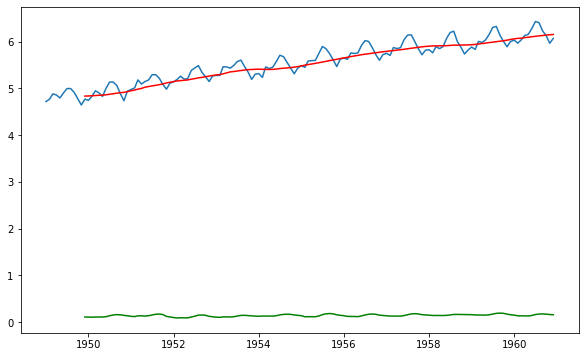

In [17]:
moving_avg = data_logScale.rolling(window=12).mean()
moving_std = data_logScale.rolling(window=12).std()
plt.plot(data_logScale)
plt.plot(moving_avg,color='red')
plt.plot(moving_std,color='green');

#### Ways to make the data as stationary
* Some times have to use 'log'
* Some times 'sqaure'
* Some time 'cube root'
#### All depends on the data

In [18]:
### Here i am using Log

datalogScaleMovingavg = data_logScale - moving_avg
datalogScaleMovingavg.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [19]:
datalogScaleMovingavg.dropna(inplace=True)
datalogScaleMovingavg.head(4)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416


###### Now we'll check the data is transformed to stationary or not.

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def testing_stationary(timeseries):
    
    ## Determining rolling statistics
    
    moving_avg = timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window=12).std()
    
    original = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(moving_avg,color='red',label='Rooling MEAN')
    std = plt.plot(moving_std,color='black',label='Rolling STD')
    
    plt.legend(loc='best')
    plt.title('Rolling MEAN & STD')
    plt.show()
    
    ## Performing Dickeyfuller Test
    
    print('Dickeyfuller Test Result')
    
    df_test = adfuller(timeseries['Passengers'],autolag='AIC')
    df_out = pd.Series(df_test[0:4],index=['Test Statistics','P-Value','Lag used','No. of observation'])
    
    for now,value in df_test[4].items():
        df_out['Critical value(%s)'%now] = value
    print(df_out)
    

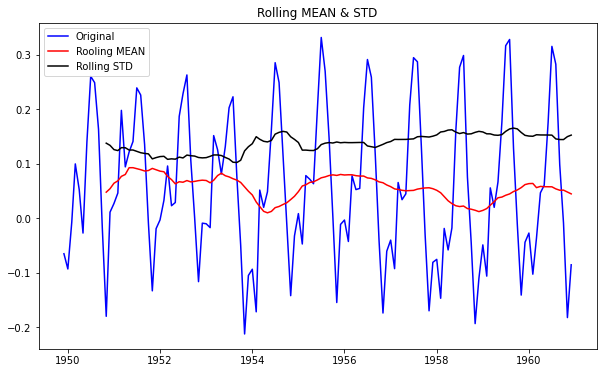

Dickeyfuller Test Result
Test Statistics         -3.162908
P-Value                  0.022235
Lag used                13.000000
No. of observation     119.000000
Critical value(1%)      -3.486535
Critical value(5%)      -2.886151
Critical value(10%)     -2.579896
dtype: float64


In [22]:
testing_stationary(datalogScaleMovingavg)

#### Now calaculate the weightage Avg of time series because we need to see the trend that is present inside the Time Series.

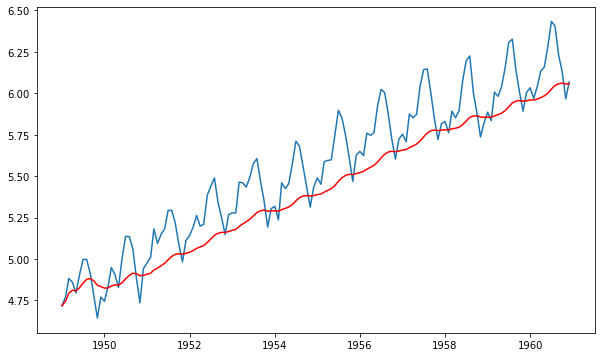

In [23]:
expo_weight_avg = data_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(data_logScale)
plt.plot(expo_weight_avg,color='red');

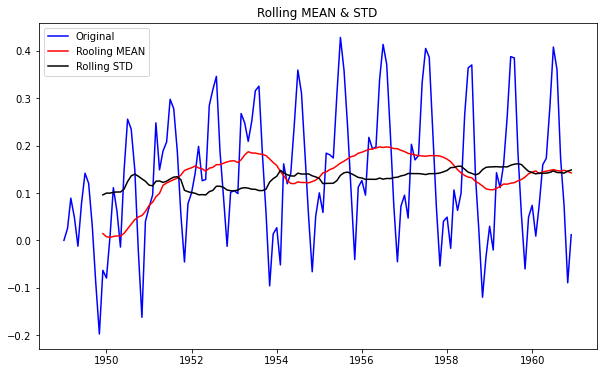

Dickeyfuller Test Result
Test Statistics         -3.601262
P-Value                  0.005737
Lag used                13.000000
No. of observation     130.000000
Critical value(1%)      -3.481682
Critical value(5%)      -2.884042
Critical value(10%)     -2.578770
dtype: float64


In [24]:
datalogScale_minusmovingexpo = data_logScale - expo_weight_avg
testing_stationary(datalogScale_minusmovingexpo);

### Now shifting the values

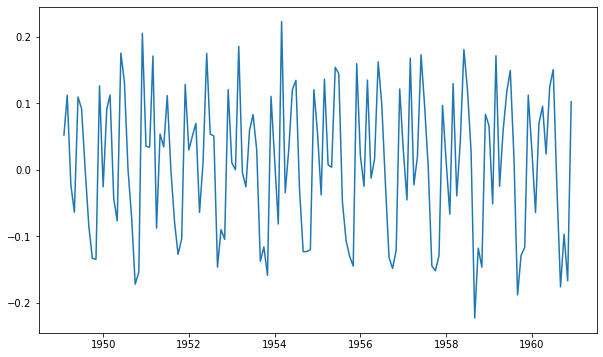

In [25]:
Datalogdiff_shifting = data_logScale - data_logScale.shift()
plt.plot(Datalogdiff_shifting)

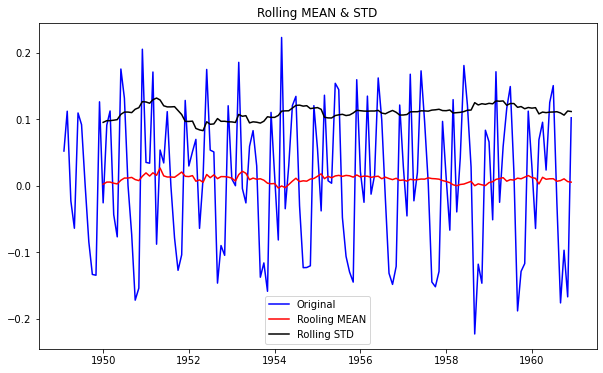

Dickeyfuller Test Result
Test Statistics         -2.717131
P-Value                  0.071121
Lag used                14.000000
No. of observation     128.000000
Critical value(1%)      -3.482501
Critical value(5%)      -2.884398
Critical value(10%)     -2.578960
dtype: float64


In [26]:
Datalogdiff_shifting.dropna(inplace= True)
testing_stationary(Datalogdiff_shifting);

#### Now we can say that our data time series is stationary

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_logScale)

In [28]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

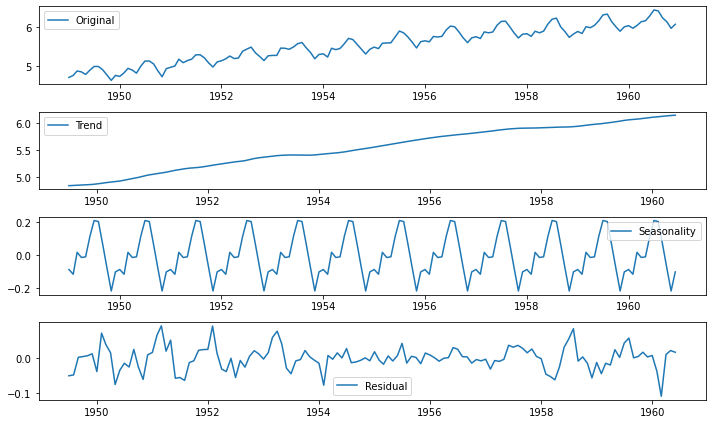

In [29]:
plt.subplot(411)
plt.plot(data_logScale,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout();

In [30]:
decomposed_logdata = residual
decomposed_logdata.dropna(inplace=True)


### PAC for p-value and ACF for q value

In [31]:
from statsmodels.tsa.stattools import acf,pacf

In [32]:
import warnings
warnings.filterwarnings('ignore')

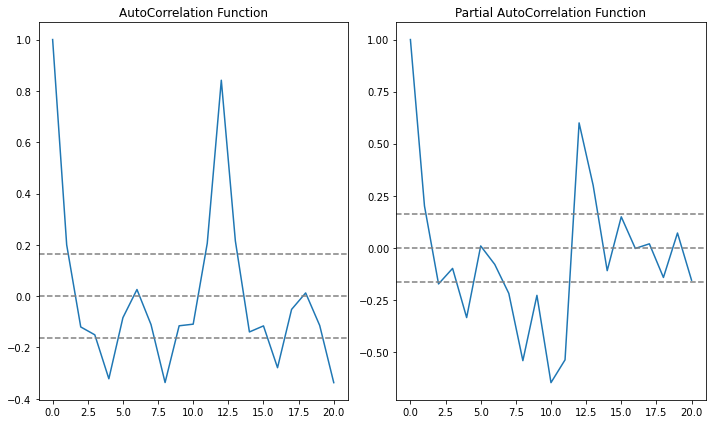

In [33]:
lag_acf = acf(Datalogdiff_shifting,nlags = 20)
lag_pacf = pacf(Datalogdiff_shifting,nlags = 20,method = 'ols')

# plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Datalogdiff_shifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Datalogdiff_shifting)),linestyle='--',color='gray')
plt.title('AutoCorrelation Function')

# plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Datalogdiff_shifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Datalogdiff_shifting)),linestyle='--',color='gray')
plt.title('Partial AutoCorrelation Function')

plt.tight_layout();

#### Now we check what is the value that the graph cuts off or drops to zero at the first time.

## Implimanting ARIMA

In [34]:
from statsmodels.tsa.arima_model import ARIMA

Plot AR Model


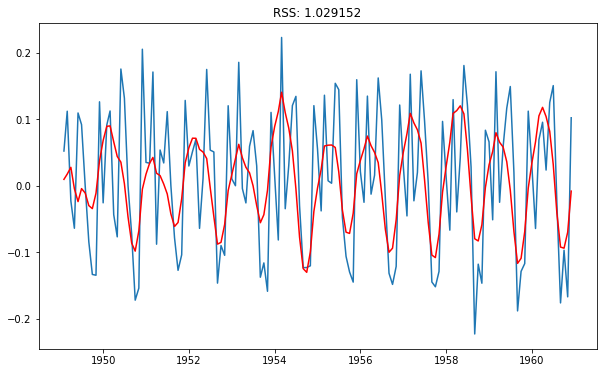

In [35]:
# AR Model
model = ARIMA(data_logScale,order=(2,1,2))
result_AR = model.fit(disp= -1)
plt.plot(Datalogdiff_shifting)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS: %4f'%sum((result_AR.fittedvalues - Datalogdiff_shifting['Passengers'])**2))
print('Plot AR Model')

Plot MA Model


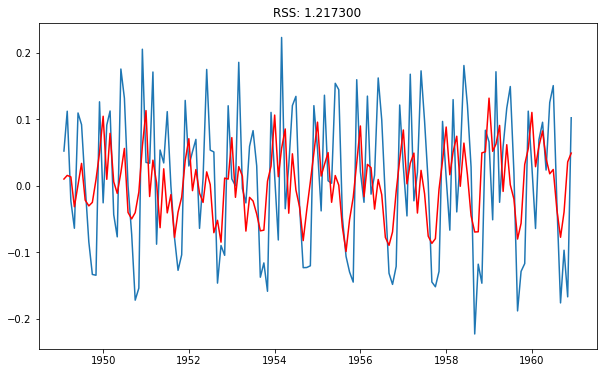

In [36]:
# MA Model 
model = ARIMA(data_logScale,order= (1,1,2))
result_MA = model.fit(disp= -1)
plt.plot(Datalogdiff_shifting)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RSS: %4f'%sum((result_MA.fittedvalues - Datalogdiff_shifting['Passengers'])**2))
print('Plot MA Model')

Plot ARIMA Model


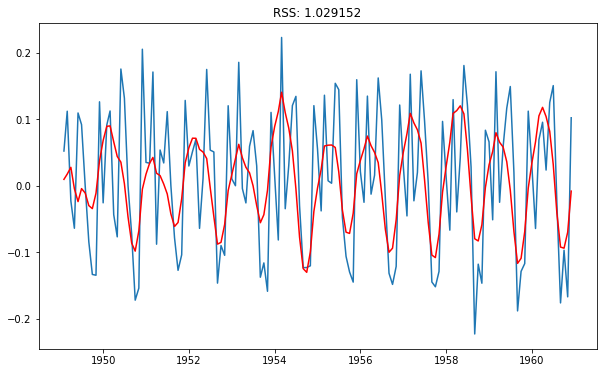

In [37]:
model = ARIMA(data_logScale,order=(2,1,2))
result_ARIMA = model.fit(disp= -1)
plt.plot(Datalogdiff_shifting)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RSS: %4f'%sum((result_ARIMA.fittedvalues - Datalogdiff_shifting['Passengers'])**2))
print('Plot ARIMA Model')

In [38]:
Prediction_Arima_Diff = pd.Series(result_ARIMA.fittedvalues,copy=True)
Prediction_Arima_Diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [39]:
#Convert to comulative Sum

Prediction_Arima_Diff_Cumsum = Prediction_Arima_Diff.cumsum()
Prediction_Arima_Diff_Cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [40]:
Prediction_Arima_Log = pd.Series(data_logScale['Passengers'].iloc[0],index=data_logScale.index)
Prediction_Arima_Log = Prediction_Arima_Log.add(Prediction_Arima_Diff_Cumsum,fill_value=0)
Prediction_Arima_Log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

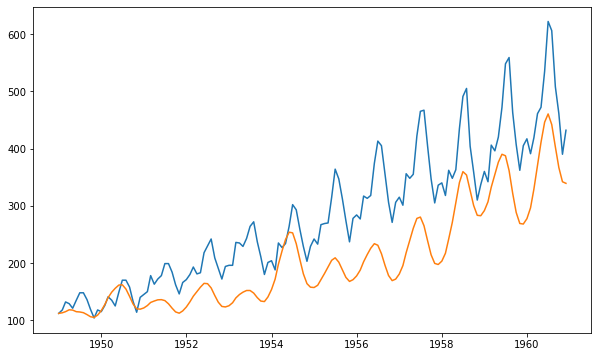

In [41]:
prediction_ARIMA = np.exp(Prediction_Arima_Log)
plt.plot(data)
plt.plot(prediction_ARIMA);

## Forcasting the data

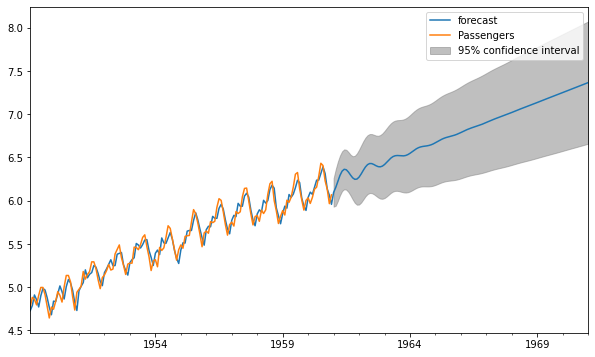

In [42]:
result_ARIMA.plot_predict(1,264)
x = result_ARIMA.forecast(steps=120);